
Training Data Analysis:
Shape: (8523, 12)
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
<c

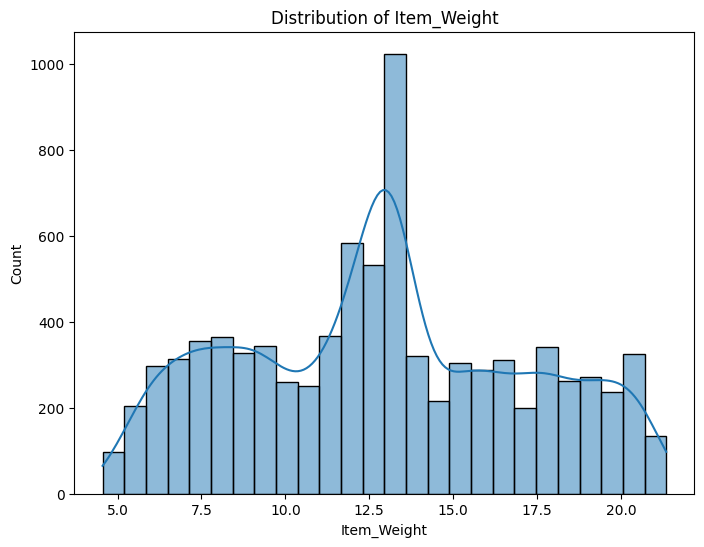

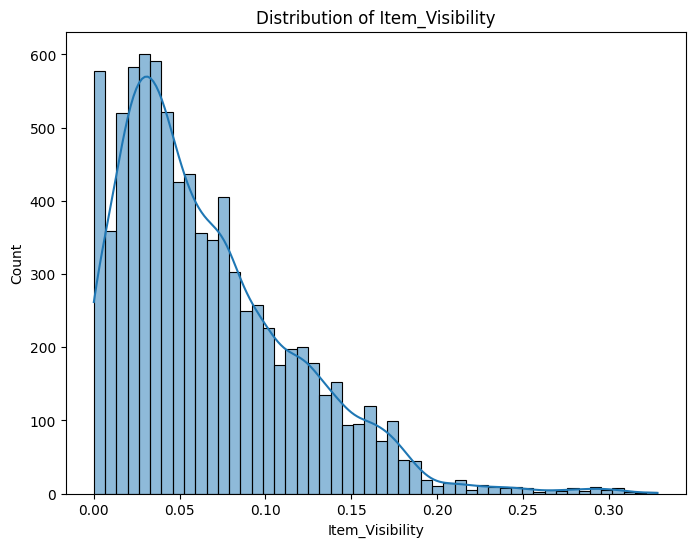

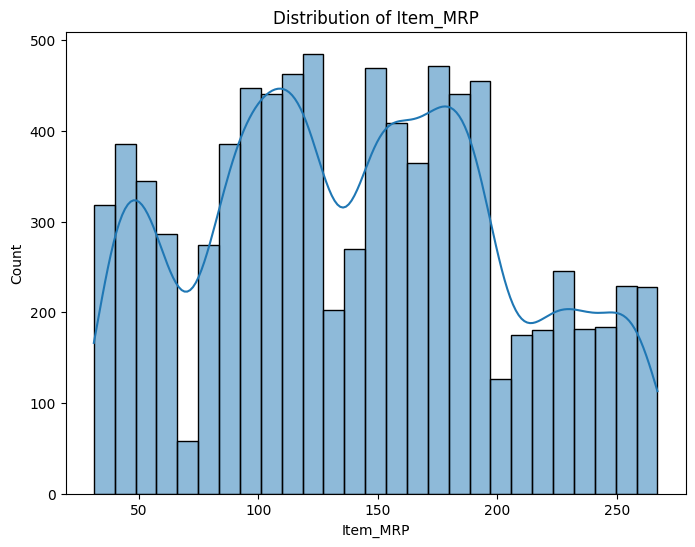

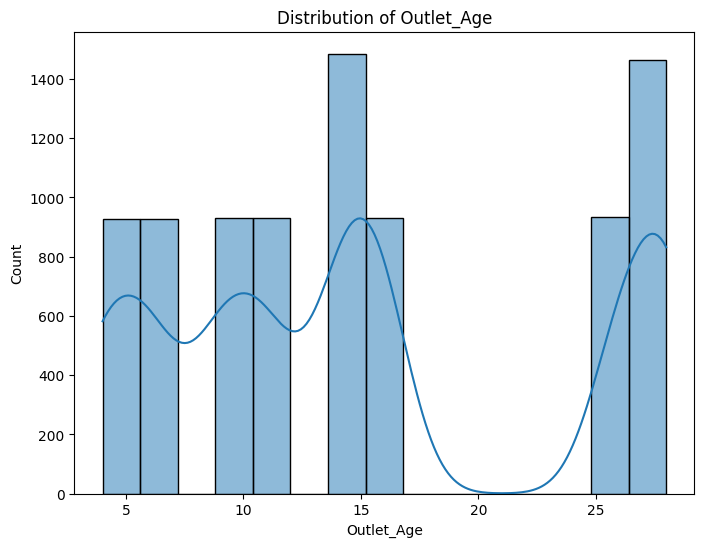

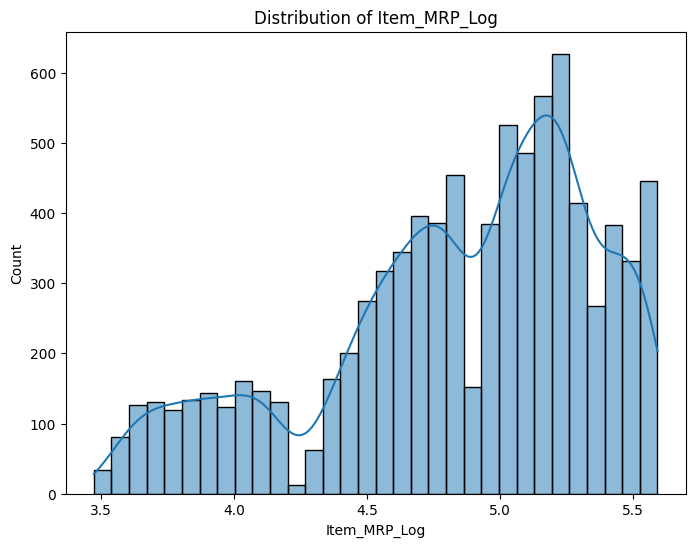

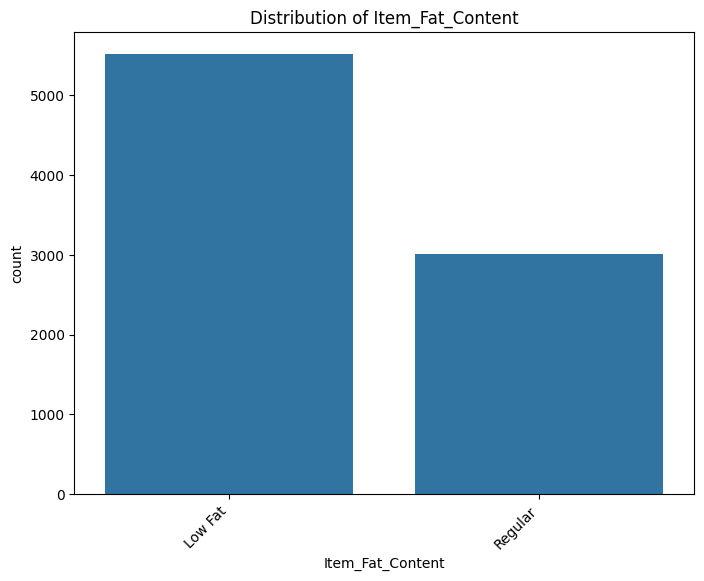

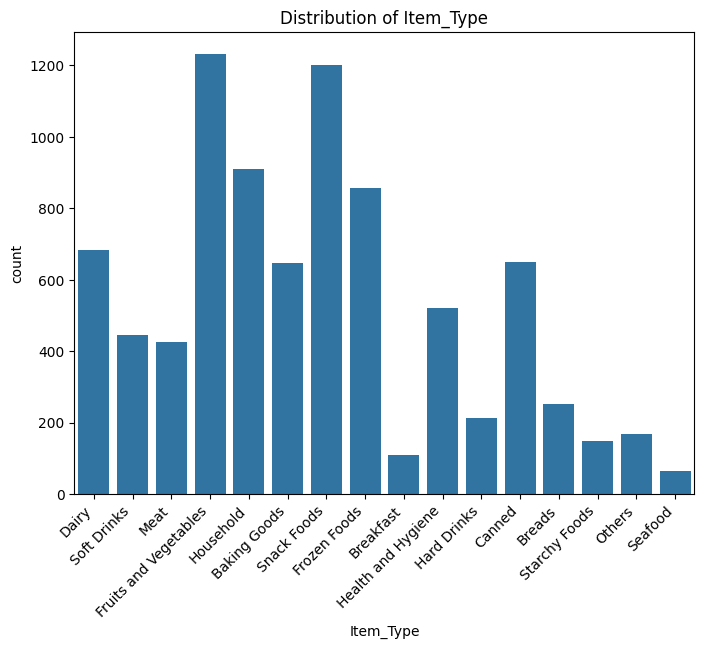

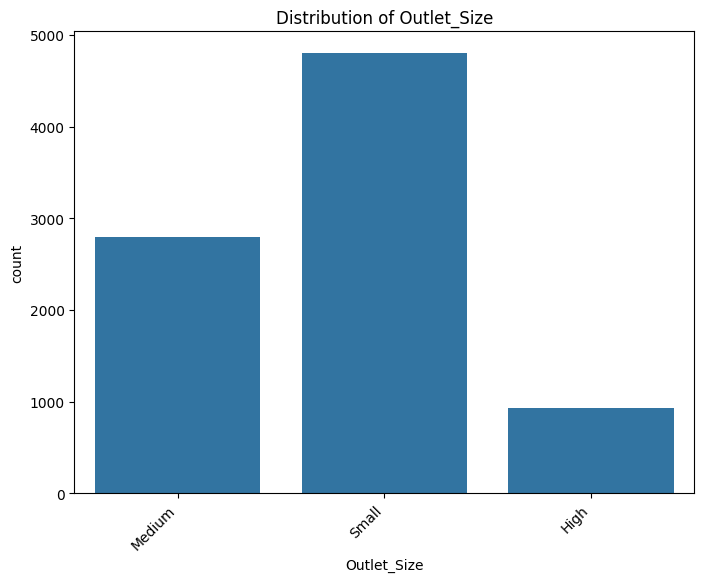

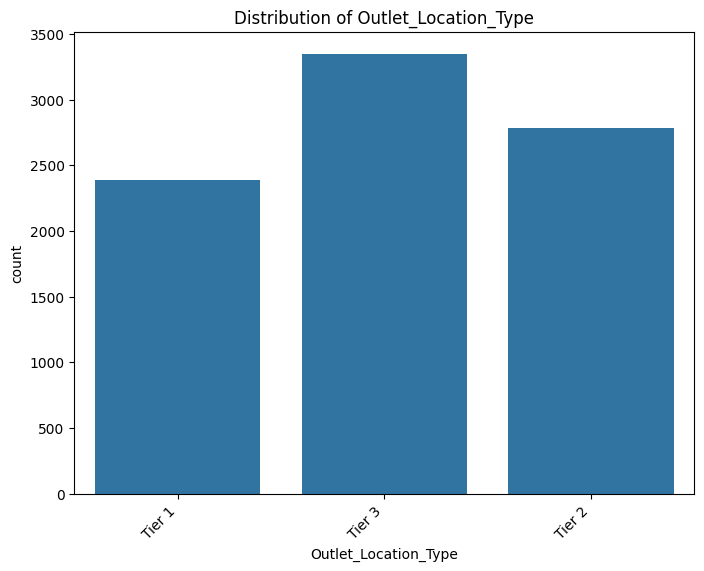

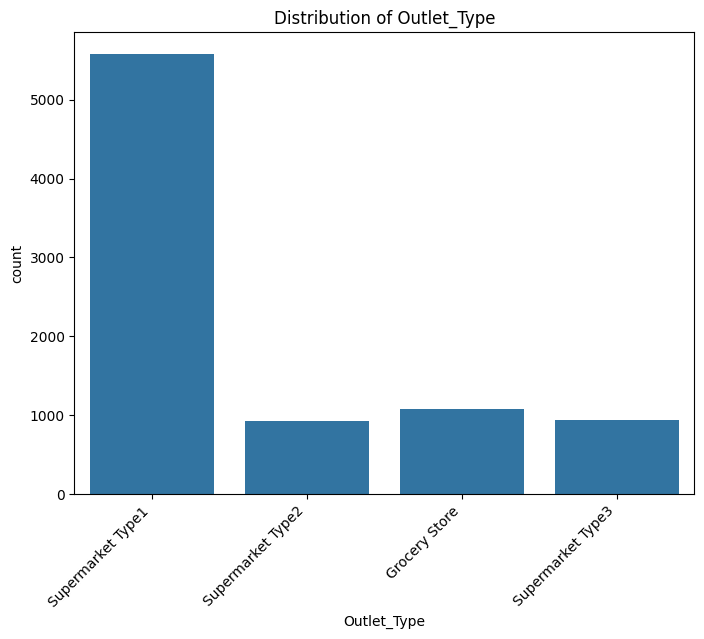

In [20]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore')

# Загрузка данных
train_data_original = pd.read_csv('Train.csv')
test_data_original = pd.read_csv('Test.csv')

# Создаем копии данных для обработки
train_data = train_data_original.copy()
test_data = test_data_original.copy()

#Анализ данных
def analyze_dataset(df, name="Dataset"):
    print(f"\n{name} Analysis:")
    print(f"Shape: {df.shape}")
    print(df.describe())
    print(df.info())

analyze_dataset(train_data, "Training Data")
analyze_dataset(test_data, "Test Data")

# Функция для предобработки данных
def preprocess_data(df):
    # Создаем копию датафрейма
    df_processed = df.copy()
    
    # Обработка Item_Fat_Content
    df_processed['Item_Fat_Content'] = df_processed['Item_Fat_Content'].replace({
        'low fat': 'Low Fat', 
        'LF': 'Low Fat', 
        'reg': 'Regular'
    })

    # Обработка пропущенных значений
    df_processed['Item_Weight'] = df_processed.groupby('Item_Type')['Item_Weight'].transform(
        lambda x: x.fillna(x.mean())
    )
    df_processed['Outlet_Size'] = df_processed.groupby('Outlet_Type')['Outlet_Size'].transform(
        lambda x: x.fillna(x.mode()[0])
    )

    # Создание новых признаков
    df_processed['Outlet_Age'] = 2013 - df_processed['Outlet_Establishment_Year']
    df_processed['Item_MRP_Log'] = np.log1p(df_processed['Item_MRP'])

    return df_processed

# Обработка данных
train_data_processed = preprocess_data(train_data)
test_data_processed = preprocess_data(test_data)

# Визуализация распределений признаков
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Item_MRP_Log']
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Создание визуализаций для числовых признаков
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data_processed[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Создание визуализаций для категориальных признаков
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=train_data_processed[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()